# Analysis of environmental data
In this notebook, we will analyze the oceanographic data collected during the Spring Campaign of 2023. The data was collected using a CTD (Conductivity, Temperature, Depth) sensor and the ships underway system. The CTD sensor was deployed every hour at 4 different locations in the Southern North Sea. We'll start with importing the data into this notebook for analysis.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [78]:
ctd_data = pd.read_csv('../data/raw/environmental_data.csv', sep=';', index_col=0)
# Make sure the index is a DateTimeIndex type to manipulate dates efficiently
ctd_data.index = pd.to_datetime(ctd_data.index)

# Only include data from stations 51 and 130
ctd_data = ctd_data[ctd_data['StationPrefix'].isin(['51', '130'])]

# It looks like the time is off by two hours, so we'll add two hours to the index
ctd_data.index = ctd_data.index + pd.Timedelta(hours=2)

In [79]:
ctd_data['Day'].unique()

array([18, 19, 20, 21])

Now, let's add time of high and low tides. We downloaded tidal predictions from the [Flanders Maritime Agency](https://www.agentschapmdk.be/nl/publicaties#getijgegevens-2023), and used the tables for Vlissingen (Station 51) and Ostend (Station 130). In Vlissingen we sampled from 18/04/2023 13:00 to 19/04/2023 09:00. In Ostend we sampled from 20/4/2023 10:00 to 21/4/2023 10:00. Here's the values:

| Location | Date | high tide | low tide | station |
| :-------: | :--------: | :---: | :----------: | :---: |
| Vlissingen | 18/04/2023 | 13:52 | 20:12 | 51 |
| Vlissingen | 19/04/2023 | 02:06 | 08:40 | 51 |
| Ostend | 20/04/2023 | 01:45 | 08:33 | 130 |
| Ostend | 20/04/2023 | 14:12 | 20:50 | 130 |
| Ostend | 21/04/2023 | 02:26 | 09:14 | 130 |

In [89]:
# Create a tides dataframe
tides_df = pd.DataFrame({
    'Location': ['Vlissingen', 'Vlissingen', 'Ostend', 'Ostend'],
    'Datetime_high_tide': pd.to_datetime(['18/04/2023 13:52', '19/04/2023 02:06', 
                                          '20/04/2023 14:12', '21/04/2023 02:26']),
    'Datetime_low_tide': pd.to_datetime(['18/04/2023 20:12', '19/04/2023 08:40', 
                                         '20/04/2023 20:50', '21/04/2023 09:14']),
    'Station': [51, 51, 130, 130]
})

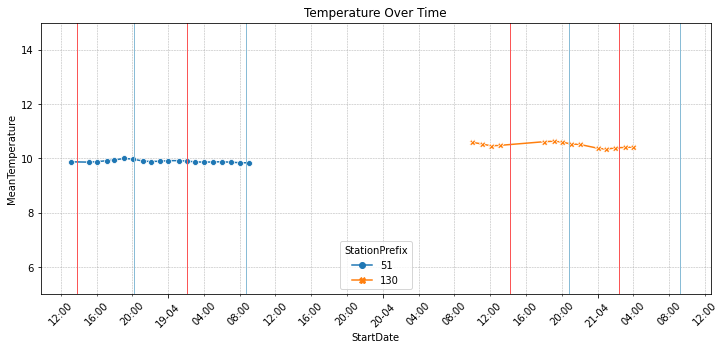

In [108]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanTemperature",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Temperature Over Time')

# Set y axis limits
ax.set_ylim(5, 15)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/temperature.svg', format='svg')

# Display the plot
plt.show()

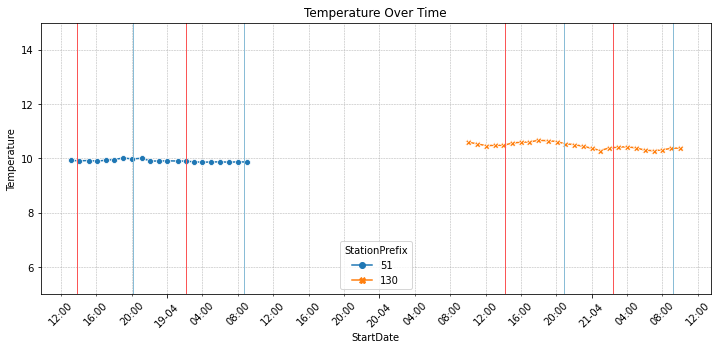

In [109]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="Temperature",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Temperature Over Time')

# Set y axis limits
ax.set_ylim(5, 15)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/temperature2.svg', format='svg')

# Display the plot
plt.show()

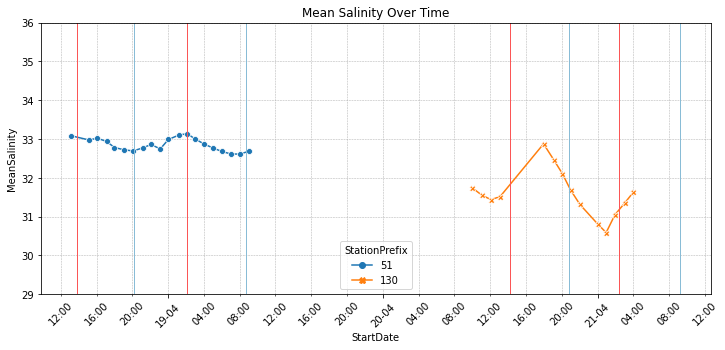

In [110]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanSalinity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Mean Salinity Over Time')

# Set y axis limits
ax.set_ylim(29, 36)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)
            
# Saving the plot as a .svg file
plt.savefig('../figures/environmental/salinity.svg', format='svg')

# Display the plot
plt.show()

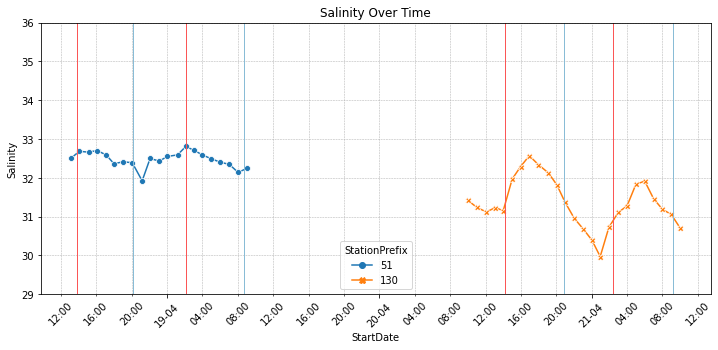

In [111]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="Salinity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Salinity Over Time')

# Set y axis limits
ax.set_ylim(29, 36)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/salinity2.svg', format='svg')

# Display the plot
plt.show()

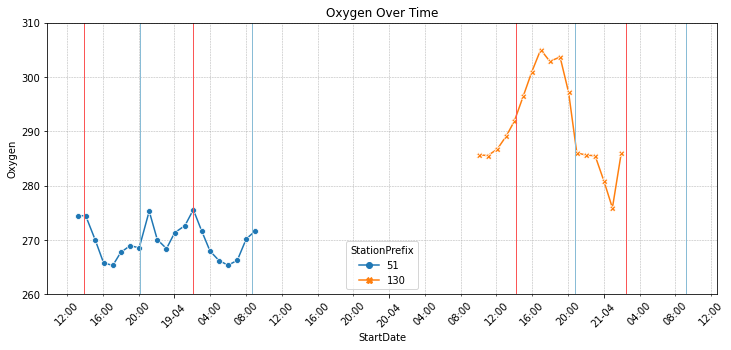

In [94]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="Oxygen",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Oxygen Over Time')

# Set y axis limits
ax.set_ylim(260, 310)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/oxygen.svg', format='svg')

# Display the plot
plt.show()

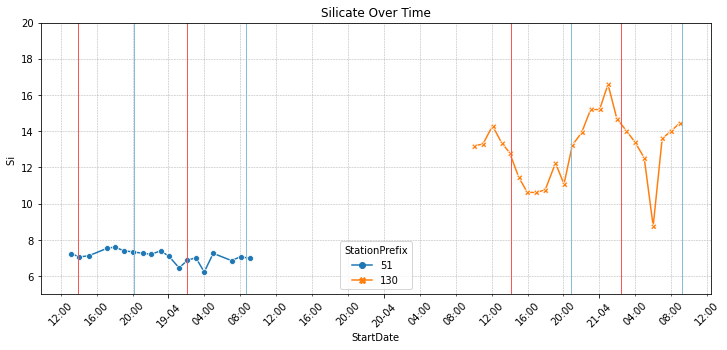

In [95]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="Si ",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Silicate Over Time')

# Set y axis limits
ax.set_ylim(5, 20)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/SI.svg', format='svg')

# Display the plot
plt.show()

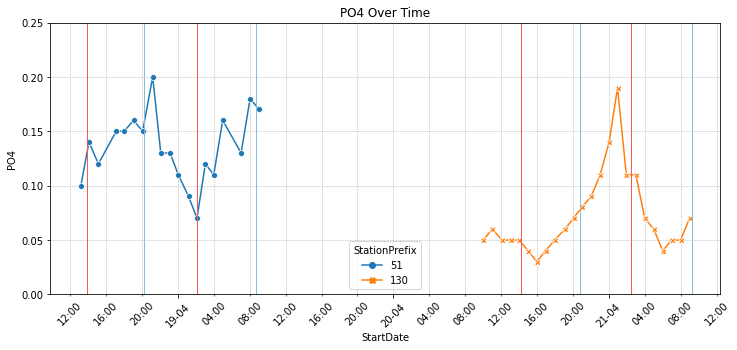

In [96]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="PO4",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('PO4 Over Time')

# Set y axis limits
ax.set_ylim(0, 0.25)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/PO4.svg', format='svg')

# Display the plot
plt.show()

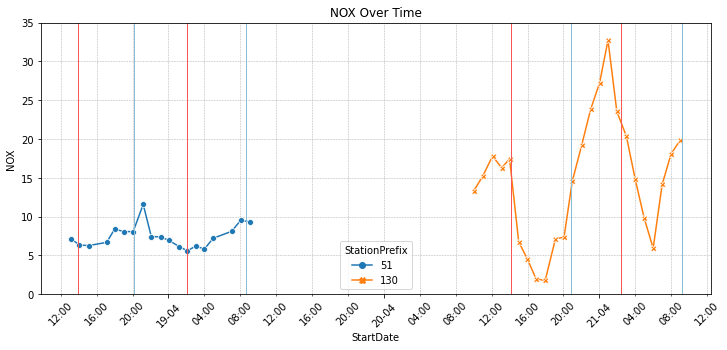

In [97]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="NOX ",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('NOX Over Time')

# Set y axis limits
ax.set_ylim(0, 35)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/NOX.svg', format='svg')

# Display the plot
plt.show()

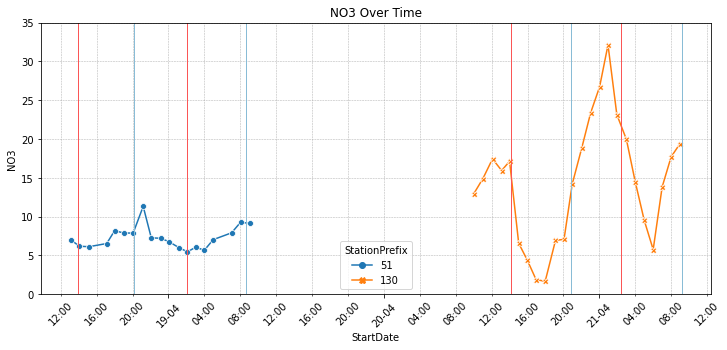

In [98]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="NO3",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('NO3 Over Time')

# Set y axis limits
ax.set_ylim(0, 35)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/NO3.svg', format='svg')

# Display the plot
plt.show()

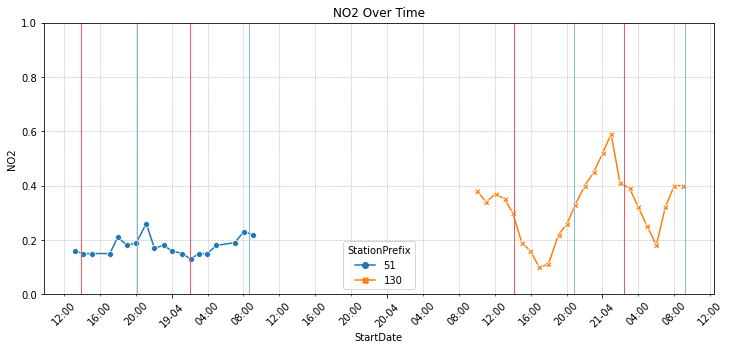

In [99]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="NO2",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('NO2 Over Time')

# Set y axis limits
ax.set_ylim(0, 1)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/NO2.svg', format='svg')

# Display the plot
plt.show()

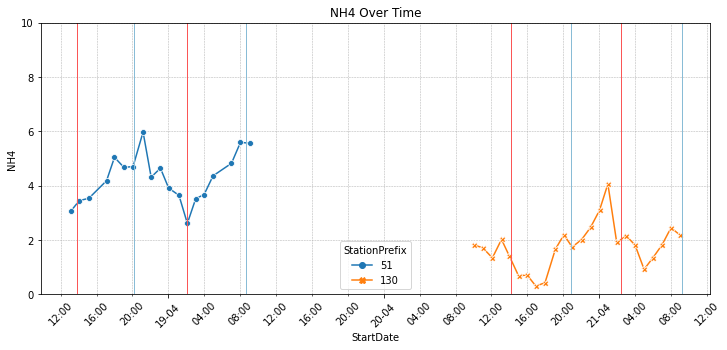

In [100]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="NH4",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('NH4 Over Time')

# Set y axis limits
ax.set_ylim(0, 10)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/NH4.svg', format='svg')

# Display the plot
plt.show()

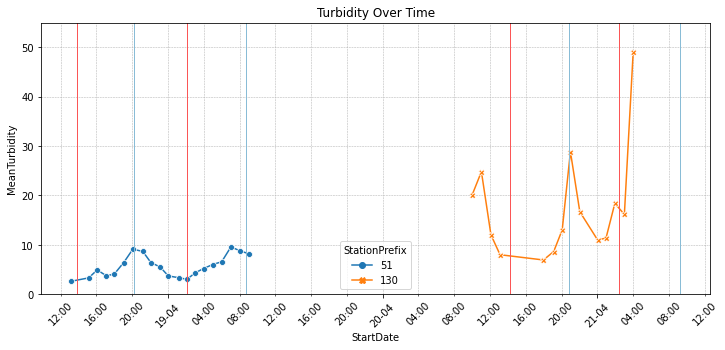

In [101]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanTurbidity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Turbidity Over Time')

# Set y axis limits
ax.set_ylim(0, 55)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)
            
# Saving the plot as a .svg file
plt.savefig('../figures/environmental/turbidity.svg', format='svg')

# Display the plot
plt.show()

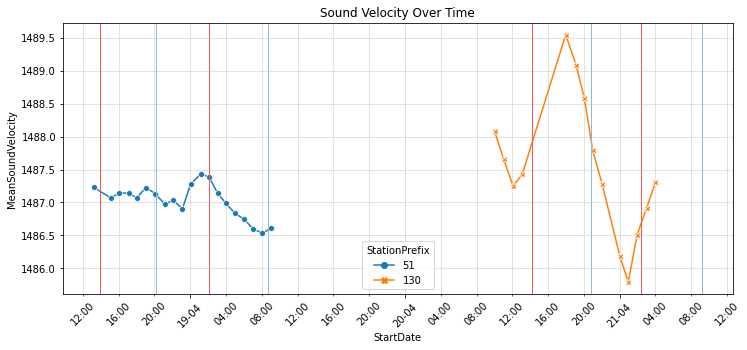

In [102]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanSoundVelocity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Sound Velocity Over Time')

# Set y axis limits
#ax.set_ylim(30, 36)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/sound_velocity.svg', format='svg')

# Display the plot
plt.show()

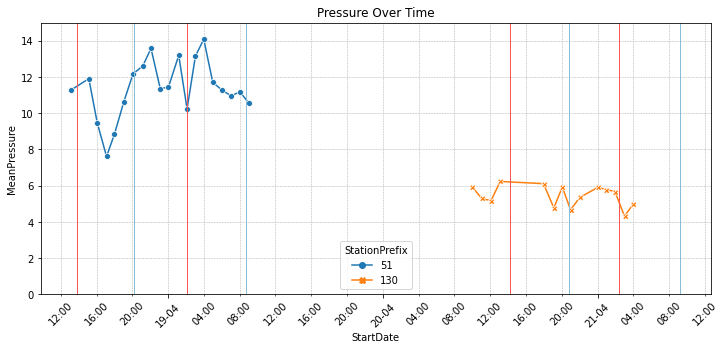

In [103]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanPressure",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Pressure Over Time')

# Set y axis limits
ax.set_ylim(0, 15)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/pressure.svg', format='svg')

# Display the plot
plt.show()

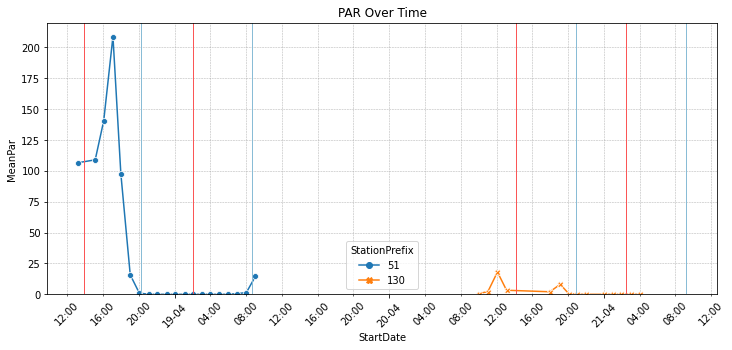

In [104]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanPar",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('PAR Over Time')

# Set y axis limits
ax.set_ylim(0, 220)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/par.svg', format='svg')

# Display the plot
plt.show()

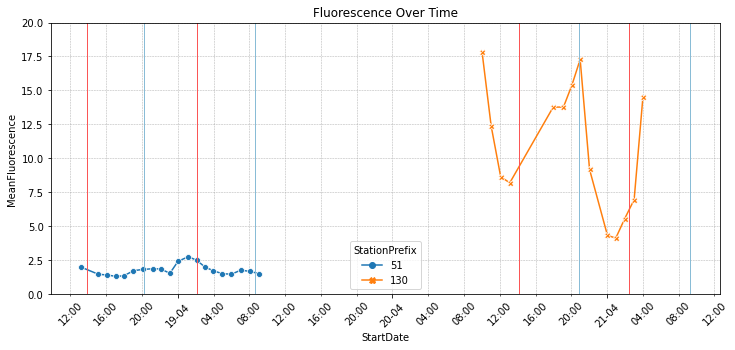

In [105]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanFluorescence",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Fluorescence Over Time')

# Set y axis limits
ax.set_ylim(0, 20)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/fluorescence.svg', format='svg')

# Display the plot
plt.show()

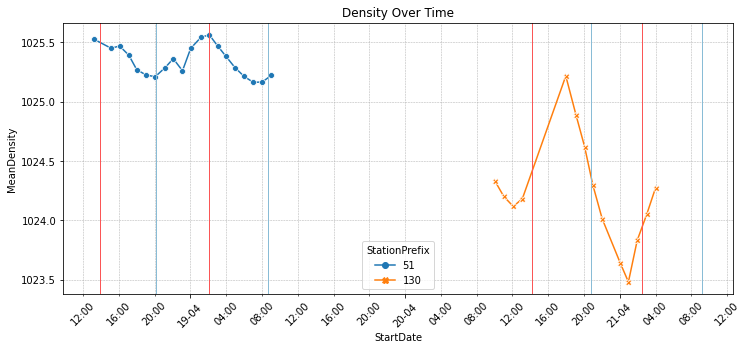

In [106]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanDensity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Density Over Time')

# Set y axis limits
#ax.set_ylim(30, 36)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/density.svg', format='svg')

# Display the plot
plt.show()

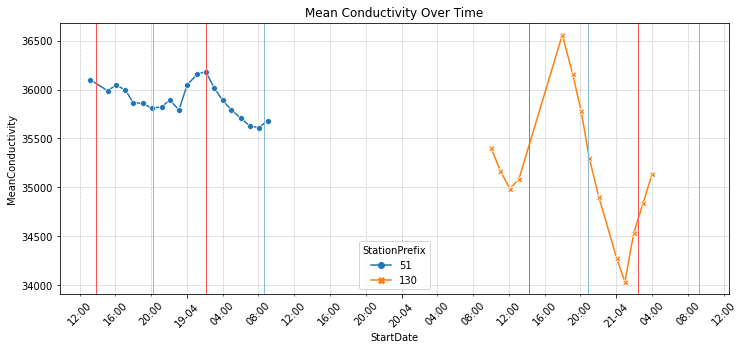

In [107]:
# Plot the average temperature concentration over time, coloured per station
## Initiate the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Creating the lineplot
sns.lineplot(x=ctd_data.index, y="MeanConductivity",
             hue="StationPrefix",
             style="StationPrefix",
             markers=True,
             dashes=False,
             data=ctd_data, ax=ax)

# Setting the title with the parameter being plotted
ax.set_title('Mean Conductivity Over Time')

# Set y axis limits
#ax.set_ylim(30, 36)

# Formatting the x-axis to show day and month
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Showing time every 4 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 4)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# Rotating and showing the x-axis labels
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)

# Showing a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add vertical lines for high and low tides
for index, row in tides_df.iterrows():
    if str(row['Station']) in ctd_data['StationPrefix'].unique():
        if ctd_data.index.min() <= row['Datetime_high_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_high_tide'], color='#FB5656', linestyle='-', linewidth=1)
        if ctd_data.index.min() <= row['Datetime_low_tide'] <= ctd_data.index.max():
            ax.axvline(row['Datetime_low_tide'], color='#89BCD6', linestyle='-', linewidth=1)

# Saving the plot as a .svg file
plt.savefig('../figures/environmental/conductivity.svg', format='svg')

# Display the plot
plt.show()

## Analysing the ship's location
Now we'll plot the sampling points and where the ship was at the time of sampling. We'll use the [Basemap](https://matplotlib.org/basemap/) package to plot the map.

In [ ]:
# Assuming ctd_data is your DataFrame
# Resample the data to have hourly data if it's not already
ctd_hourly = ctd_data.resample('H').first()

# Define a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set up the Basemap
# This example sets up a world map in cylindrical projection. You can adjust the parameters as needed.
m = Basemap(projection='cyl', llcrnrlon=min(ctd_hourly['StartLong']) - 2, llcrnrlat=min(ctd_hourly['StartLat']) - 2,
            urcrnrlon=max(ctd_hourly['StartLong']) + 2, urcrnrlat=max(ctd_hourly['StartLat']) + 2, resolution='h', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')
m.drawparallels(np.arange(-90., 91., 1.), labels=[True, False, False, True], linewidth=0.5)
m.drawmeridians(np.arange(-180., 181., 1.), labels=[True, False, False, True], linewidth=0.5)
m.drawmapboundary(fill_color='aqua')

# Convert ship coordinates from lat/lon to map projection coordinates
x, y = m(ctd_hourly['StartLong'].values, ctd_hourly['StartLat'].values)
m.scatter(x, y, s=50, c='red', marker='o', edgecolors='k', label='Ship Position')

# Adding title and legend
plt.title("Ship's Hourly Positions")
plt.legend(loc='lower left')

# Save the figure as SVG
plt.savefig('ship_positions.svg', format='svg')
plt.show()
